<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionalesI/blob/main/Semana15/HiddenMarkovModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations
from itertools import combinations
from itertools import combinations_with_replacement

In [3]:
# Definimos estados y priors
States = np.array([0,1]) # Deben ser enteros
Prior = np.array([0.4,0.6])

In [4]:
# Definimos matrices de emisión y transmision
T = np.array([[0.7,0.5],[0.3,0.5]])

E = np.array([[0.8,0.2],[0.1,0.3],[0.1,0.5]])

#np.sum(T,axis=0)

In [7]:
# Secuencia Observad
Obs = np.array([1,2,0])

In [5]:
DictH = {0:'Feliz',1:'Triste'}
DictH[0]

'Feliz'

In [6]:
DictO = {0:'Rojo',1:'Verde',2:'Azul'}
DictO[0]

'Rojo'

In [15]:
def GetStates(State,N):
    CStates = list(combinations_with_replacement(State,N))

    Permu = []

    for it in CStates:
      p = list(permutations(it,N))
     # print(p)
      for i in p:
        if i not in Permu:
          Permu.append(i)

    CStates = np.array(Permu)

    return CStates

In [18]:
HiddenStates = GetStates(States,3)
HiddenStates

array([[0, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 1],
       [1, 0, 1],
       [1, 1, 0],
       [1, 1, 1]])

In [39]:
def GetProb(T,E,Obs,State,Prior):

  n = len(Obs)
  p = 1.
  # Probabilidad a priori
  p *= Prior[ State[0] ]

  for i in range(n-1): # El ultimo no va a ningun lado
    p *= T[ State[i+1], State[i] ]

  for i in range(n):
    p *= E[ Obs[i], State[i] ]

  return p


In [40]:
P = np.zeros(HiddenStates.shape[0])

for i in range(P.shape[0]):
  P[i] = GetProb(T,E,Obs,HiddenStates[i],Prior)

P

array([0.001568, 0.000168, 0.0024  , 0.00504 , 0.0006  , 0.00054 ,
       0.018   , 0.0045  ])

In [42]:
ii = np.where( P == np.max(P) )
print(HiddenStates[ii],P[ii])

[[1 1 0]] [0.018]


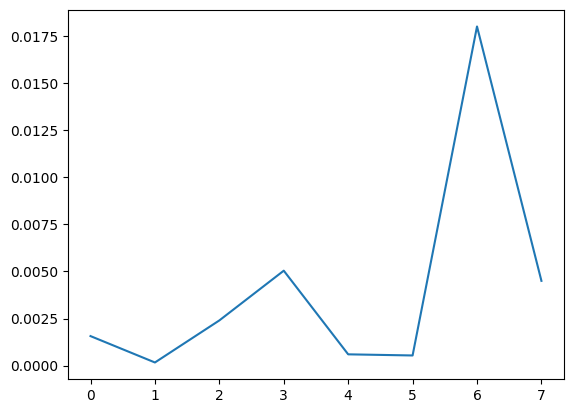

In [41]:
plt.plot(P)